# what first impressions, name three use cases, analyze dataset on the matter of tests gruops: what do you notice?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('Cars_dataset.csv')

C:\ProgramData\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (14,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.loc[1, :]

src_ad_id        1.1092e+09
telclicks                 0
bids                     20
kleur                 Zwart
carrosserie               ?
kmstand              335000
days_live                14
photo_cnt                 8
aantaldeuren           None
n_asq                   147
bouwjaar               2011
emissie                  89
energielabel              A
brand            VOLKSWAGEN
l2                      157
ad_start_dt      11/18/2016
vermogen                 55
webclicks                 0
model                  POLO
aantalstoelen             5
price                 45000
test group                a
Name: 1, dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183062 entries, 0 to 183061
Data columns (total 22 columns):
src_ad_id        183062 non-null float64
telclicks        183053 non-null float64
bids             183053 non-null float64
kleur            183062 non-null object
carrosserie      183062 non-null object
kmstand          181658 non-null float64
days_live        183062 non-null int64
photo_cnt        183062 non-null int64
aantaldeuren     183062 non-null object
n_asq            183062 non-null int64
bouwjaar         183062 non-null float64
emissie          183062 non-null object
energielabel     183062 non-null object
brand            183062 non-null object
l2               183062 non-null object
ad_start_dt      183062 non-null object
vermogen         183062 non-null float64
webclicks        183053 non-null float64
model            183061 non-null object
aantalstoelen    183061 non-null object
price            183055 non-null float64
test group       3634 non-null object
dtypes

## verwijder niet belangrijke variabelen voor de duidelijkheid

In [5]:
df.drop(['src_ad_id'], axis = 1, inplace = True)

## 3 use cases
- voorspellen van verkoopprijs door middel van verschillende andere variableen, zoals km stand, merk, model, aantal deuren etc.
- aantal clicks/biedingen per test group
- 

## kijken naar missing values

In [6]:
df.dropna(subset = ['price'], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183055 entries, 0 to 183061
Data columns (total 21 columns):
telclicks        183046 non-null float64
bids             183046 non-null float64
kleur            183055 non-null object
carrosserie      183055 non-null object
kmstand          181651 non-null float64
days_live        183055 non-null int64
photo_cnt        183055 non-null int64
aantaldeuren     183055 non-null object
n_asq            183055 non-null int64
bouwjaar         183055 non-null float64
emissie          183055 non-null object
energielabel     183055 non-null object
brand            183055 non-null object
l2               183055 non-null object
ad_start_dt      183055 non-null object
vermogen         183055 non-null float64
webclicks        183046 non-null float64
model            183054 non-null object
aantalstoelen    183054 non-null object
price            183055 non-null float64
test group       3634 non-null object
dtypes: float64(7), int64(3), object(11)
memory

## veranderen test groep naam en kijken naar verschil in biedingen/clicks per groep

In [7]:
df.rename({'test group ':'testgroep', 'brand':'merk'}, axis = 1, inplace = True)

In [8]:
df2 = df.groupby(df['testgroep']).count()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020E834E0668>,
      dtype=object)

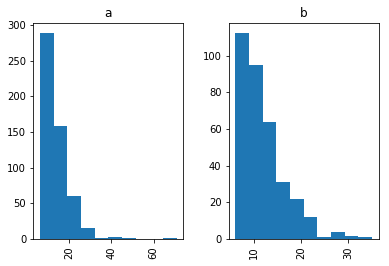

In [9]:
df[df['bids'] > 5].hist('bids', by = 'testgroep')

In [10]:
df['bids'].groupby(df['testgroep']).sum()

testgroep
a    7722.0
b    4512.0
Name: bids, dtype: float64

In [11]:
df['telclicks'].groupby(df['testgroep']).sum()

testgroep
a    9617.0
b    6049.0
Name: telclicks, dtype: float64

In [12]:
df['webclicks'].groupby(df['testgroep']).sum()

testgroep
a    9978.0
b    6462.0
Name: webclicks, dtype: float64

In [13]:
df['totalclicks'] = df['telclicks'] + df['webclicks']

In [14]:
temp1 = df['totalclicks'].groupby(df['testgroep']).sum()
temp2 = df['telclicks'].groupby(df['testgroep']).sum()
temp3 = df['webclicks'].groupby(df['testgroep']).sum()
temp4 = df['bids'].groupby(df['testgroep']).sum()
temp5 = df['bids'].groupby(df['testgroep'])

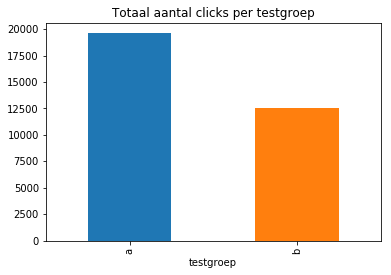

In [15]:
temp1.plot(kind = 'bar', title = 'Totaal aantal clicks per testgroep')

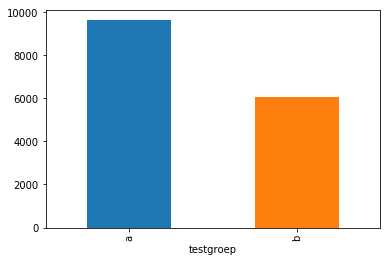

In [16]:
temp2.plot(kind = 'bar', title = 'Totaal aantal telefoon clicks')

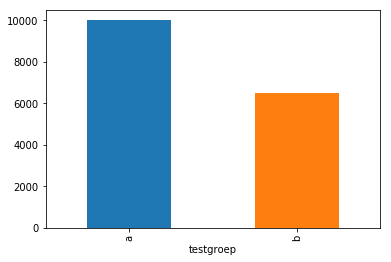

In [17]:
temp3.plot(kind = 'bar', title = 'Totaal aantal webclicks')

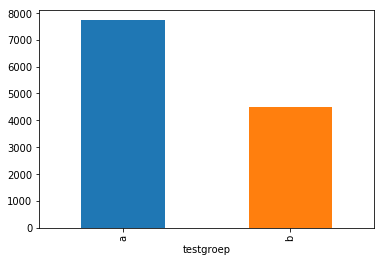

In [18]:
temp4.plot(kind = 'bar', title = 'Totaal aantal biedingen')

In [19]:
bidsa = df[df['testgroep'] == 'a']['bids']
bidsb = df[df['testgroep'] == 'b']['bids']
webclicksa = df[df['testgroep'] == 'a']['webclicks']
webclicksb = df[df['testgroep'] == 'b']['webclicks']
telclicksa = df[df['testgroep'] == 'a']['telclicks']
telclicksb = df[df['testgroep'] == 'b']['telclicks']


In [20]:
from scipy import stats
print(stats.ttest_ind(bidsa,bidsb, nan_policy='omit'))
print(stats.ttest_ind(webclicksa,webclicksb, nan_policy='omit'))
print(stats.ttest_ind(telclicksa,telclicksb, nan_policy='omit'))

Ttest_indResult(statistic=9.064883234825665, pvalue=1.9940669476752188e-19)
Ttest_indResult(statistic=3.6723551326586525, pvalue=0.00024378741867462159)
Ttest_indResult(statistic=7.6333923678552145, pvalue=2.904445939150912e-14)


## voorspellen prijs op basis van variablen

In [21]:
df.head()

,telclicks,bids,kleur,carrosserie,kmstand,days_live,photo_cnt,aantaldeuren,n_asq,bouwjaar,...,merk,l2,ad_start_dt,vermogen,webclicks,model,aantalstoelen,price,testgroep,totalclicks
0,0.0,0.0,Wit,Terreinwagen,90800.0,100,8,5,282,2011.0,...,MITSUBISHI,134,11/13/2016,86.0,0.0,ASX,5,89000.0,a,0.0
1,0.0,20.0,Zwart,?,335000.0,14,8,None,147,2011.0,...,VOLKSWAGEN,157,11/18/2016,55.0,0.0,POLO,5,45000.0,a,0.0
2,0.0,6.0,Wit,Hatchback (3/5-deurs),53619.0,27,14,3,130,2009.0,...,FIAT,111,11-05-16,51.0,0.0,500,4,54990.0,NaN,0.0
3,0.0,14.0,Zwart,Hatchback (3/5-deurs),175000.0,3,11,3,125,2001.0,...,PEUGEOT,140,11-01-16,55.0,0.0,206,5,7500.0,b,0.0
4,0.0,12.0,Blauw,Hatchback (3/5-deurs),150000.0,3,5,5,114,2007.0,...,OPEL,138,11/20/2016,66.0,0.0,CORSA,5,40000.0,a,0.0


In [22]:
df.corr()

,telclicks,bids,kmstand,days_live,photo_cnt,n_asq,bouwjaar,vermogen,webclicks,price,totalclicks
telclicks,1.000000,0.380263,0.197563,0.021672,-0.199760,0.508626,-0.238774,-0.046440,0.227524,-0.016609,0.534363
bids,0.380263,1.000000,0.137121,0.164105,-0.194414,0.441849,-0.199924,-0.038508,0.026221,-0.009206,0.150859
kmstand,0.197563,0.137121,1.000000,0.007226,-0.294684,0.163686,-0.605433,0.110071,0.069618,-0.054252,0.126476
days_live,0.021672,0.164105,0.007226,1.000000,-0.034305,0.041822,-0.000795,0.050024,-0.059655,0.003031,-0.044481
photo_cnt,-0.199760,-0.194414,-0.294684,-0.034305,1.000000,-0.194410,0.415901,0.207522,-0.024714,0.051204,-0.088745
n_asq,0.508626,0.441849,0.163686,0.041822,-0.194410,1.000000,-0.213100,-0.031449,0.152519,-0.017947,0.303729
bouwjaar,-0.238774,-0.199924,-0.605433,-0.000795,0.415901,-0.213100,1.000000,0.084975,-0.115326,0.064260,-0.180541
vermogen,-0.046440,-0.038508,0.110071,0.050024,0.207522,-0.031449,0.084975,1.000000,0.095192,0.059736,0.066984
webclicks,0.227524,0.026221,0.069618,-0.059655,-0.024714,0.152519,-0.115326,0.095192,1.000000,-0.010275,0.944666
price,-0.016609,-0.009206,-0.054252,0.003031,0.051204,-0.017947,0.064260,0.059736,-0.010275,1.000000,-0.014514


In [23]:
df.shape

(183055, 22)

In [24]:
df[df['photo_cnt'] == 24]['merk'].count()

38585

In [25]:
df['merk'].groupby(df['merk']).count().sort_values(ascending = False)

merk
VOLKSWAGEN            22148
PEUGEOT               15560
RENAULT               15012
OPEL                  14987
FORD                  13316
BMW                    9259
CITROEN                8487
MERCEDES               7809
FIAT                   7202
VOLVO                  7076
AUDI                   7062
TOYOTA                 6505
SEAT                   4906
HYUNDAI                4549
KIA                    4171
NISSAN                 3866
SUZUKI                 3678
SKODA                  2737
MERCEDES-BENZ          2501
MAZDA                  2398
MITSUBISHI             2263
MINI                   1979
ALFA ROMEO             1577
HONDA                  1541
CHEVROLET              1513
DAEWOO                 1070
DAIHATSU               1052
LAND ROVER              935
SAAB                    926
CHRYSLER                626
                      ...  
TIJHOF                    1
TVR                       1
VAN ECK                   1
MELEX                     1
MATTIG BAMBERG 

In [26]:
df.head()

,telclicks,bids,kleur,carrosserie,kmstand,days_live,photo_cnt,aantaldeuren,n_asq,bouwjaar,...,merk,l2,ad_start_dt,vermogen,webclicks,model,aantalstoelen,price,testgroep,totalclicks
0,0.0,0.0,Wit,Terreinwagen,90800.0,100,8,5,282,2011.0,...,MITSUBISHI,134,11/13/2016,86.0,0.0,ASX,5,89000.0,a,0.0
1,0.0,20.0,Zwart,?,335000.0,14,8,None,147,2011.0,...,VOLKSWAGEN,157,11/18/2016,55.0,0.0,POLO,5,45000.0,a,0.0
2,0.0,6.0,Wit,Hatchback (3/5-deurs),53619.0,27,14,3,130,2009.0,...,FIAT,111,11-05-16,51.0,0.0,500,4,54990.0,NaN,0.0
3,0.0,14.0,Zwart,Hatchback (3/5-deurs),175000.0,3,11,3,125,2001.0,...,PEUGEOT,140,11-01-16,55.0,0.0,206,5,7500.0,b,0.0
4,0.0,12.0,Blauw,Hatchback (3/5-deurs),150000.0,3,5,5,114,2007.0,...,OPEL,138,11/20/2016,66.0,0.0,CORSA,5,40000.0,a,0.0


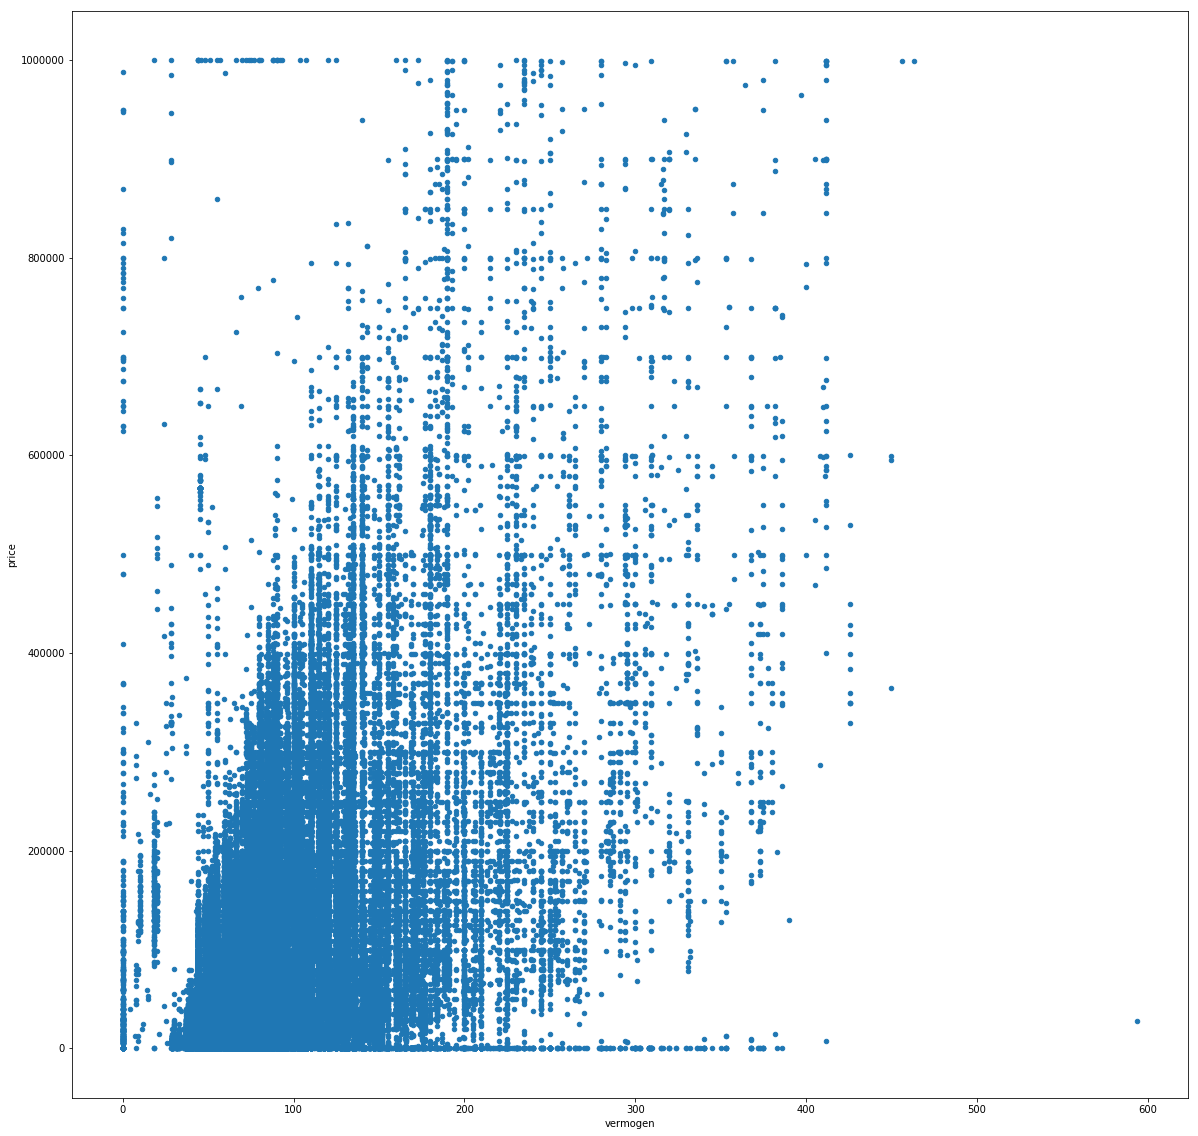

In [45]:
df[df['price'] < 1000000].plot('vermogen', 'price', kind = 'scatter', figsize = (20,20))

In [28]:
df.describe()

,telclicks,bids,kmstand,days_live,photo_cnt,n_asq,bouwjaar,vermogen,webclicks,price,totalclicks
count,183046.000000,183046.000000,1.816510e+05,183055.000000,183055.000000,183055.000000,183055.000000,183055.000000,183046.000000,1.830550e+05,183046.000000
mean,0.916901,0.678163,1.448681e+05,27.645647,15.560689,0.990544,2007.173074,85.587764,2.739497,1.009348e+05,3.656398
std,2.417588,2.200816,9.322895e+04,20.929393,6.429456,2.706555,5.437449,41.244210,6.229494,9.211753e+05,7.176663
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1991.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000,7.708750e+04,14.000000,10.000000,0.000000,2003.000000,57.000000,0.000000,2.150000e+04,0.000000
50%,0.000000,0.000000,1.384120e+05,31.000000,15.000000,0.000000,2007.000000,77.000000,1.000000,5.950000e+04,2.000000
75%,1.000000,0.000000,1.999750e+05,31.000000,22.000000,1.000000,2012.000000,100.000000,3.000000,1.195000e+05,4.000000
max,162.000000,124.000000,1.500000e+06,134.000000,24.000000,282.000000,2016.000000,594.000000,410.000000,1.000000e+08,422.000000


In [41]:
df[df['price'] == df['price'].max()].drop()


ValueError: Need to specify at least one of 'labels', 'index' or 'columns'